In [205]:
import os, re, io, tqdm, datetime, torch

import torch.nn as nn, numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings(action= 'ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


mpl.rcParams['figure.figsize'] = [16, 9]

## Creating PyTorch Model

In [276]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__() #first 3 lines are fixed
        self.dense_layer1 = nn.Linear(8, 64)
        self.relu1 = nn.ReLU()
        self.dense_layer2 = nn.Linear(64, 128)
        self.relu2 = nn.ReLU()
        self.dense_layer3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
#         self.dense_layer4 = nn.Linear(256, 128)
#         self.relu4 = nn.ReLU()
#         self.dense_layer5 = nn.Linear(128, 64)
#         self.relu5 = nn.ReLU()
        self.dense_layer4 = nn.Linear(64, 32)
        self.relu4 = nn.ReLU()
        self.output_layer = nn.Linear(32, 1)
        
    def forward(self, X):
        X = self.dense_layer1(X)
        X = self.relu1(X)
        X = self.dense_layer2(X)
        X = self.relu2(X)
        X = self.dense_layer3(X)
        X = self.relu3(X)
        X = self.dense_layer4(X)
        X = self.relu4(X)
#         X = self.dense_layer5(X)
#         X = self.relu5(X)
        X = self.output_layer(X)
        
        return X
    
regression_model = RegressionModel()
regression_model

RegressionModel(
  (dense_layer1): Linear(in_features=8, out_features=64, bias=True)
  (relu1): ReLU()
  (dense_layer2): Linear(in_features=64, out_features=128, bias=True)
  (relu2): ReLU()
  (dense_layer3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (dense_layer4): Linear(in_features=64, out_features=32, bias=True)
  (relu4): ReLU()
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
)

In [289]:
url = 'https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv'
df = pd.read_csv(r"C:\Users\zeynalovaf\Downloads\insurance.csv", on_bad_lines='skip', index_col= 0)
df = df.reset_index()
df.drop('region', axis= 1, inplace= True)
# df['region'] = df['region'].replace({'southwest': 'south', 'southeast': 'south', 'northwest': 'north', 'northeast': 'north'})
df = pd.get_dummies(df, columns= df.select_dtypes(include= 'object').columns, drop_first= True)

In [212]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [293]:
mean = df['charges'].mean()
std = df['charges'].std()


scaled_charges = (np.array(df['charges']) - mean) /  std

In [295]:
scaled_charges.max()

4.170103954308562

In [296]:
scaled_charges.min()

-1.0031822537315649

In [299]:
mean = np.arange(1, 11).mean()
std = np.arange(1, 11).std()


scaled_charges = (np.arange(1, 11) - mean) /  std

In [300]:
scaled_charges.max(), scaled_charges.min()

(1.5666989036012806, -1.5666989036012806)

In [214]:
StandardScaler()

#z = (x - u) / s 1.52 -1.52

In [311]:
EPOCHS = 200
LEARNING_RATE = 0.01
BATCH_SIZE = 64
BATCH_START = torch.arange(0, len(X_train) - len(X_train) % BATCH_SIZE, BATCH_SIZE)

optimizer = torch.optim.Adam(regression_model.parameters(), lr = LEARNING_RATE)
mse_loss = nn.MSELoss()
mae_loss = nn.L1Loss()
huber_loss = nn.SmoothL1Loss(beta= 1)

url = 'https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv'
df = pd.read_csv(r"C:\Users\zeynalovaf\Downloads\insurance.csv", on_bad_lines='skip', index_col= 0)
df = df.reset_index()
df = pd.get_dummies(df, columns= df.select_dtypes(include= 'object').columns, drop_first= True)

y = df['charges']
X = df.drop('charges', axis= 1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.10, random_state= 55)
scalling_method = MinMaxScaler()
X_train = scalling_method.fit_transform(X_train)
X_test = scalling_method.transform(X_test)


X_train = torch.tensor(X_train, dtype= torch.float32)
X_test = torch.tensor(X_test, dtype= torch.float32)
y_train = torch.tensor(np.array(y_train).reshape(-1, 1), dtype= torch.float32)
y_test = torch.tensor(np.array(y_test).reshape(-1, 1), dtype= torch.float32)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1204, 8]),
 torch.Size([134, 8]),
 torch.Size([1204, 1]),
 torch.Size([134, 1]))

In [254]:
BATCH_START

tensor([   0,   64,  128,  192,  256,  320,  384,  448,  512,  576,  640,  704,
         768,  832,  896,  960, 1024, 1088])

In [312]:
regression_model.train()

for epoch in range(1, EPOCHS+1):
    with tqdm.tqdm(BATCH_START, unit="batch", mininterval=0, disable=False) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            X_batch = X_train[start: start + BATCH_SIZE]
            y_batch = y_train[start: start + BATCH_SIZE]
            predictions = regression_model(X_batch)
            loss = mae_loss(predictions, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            bar.set_postfix(huber=float(round(loss.item(), 1)))

Epoch 68: 100%|██████████████████████████████████████████████████████| 18/18 [00:00<00:00, 169.74batch/s, huber=2111.3]


Epoch 136: 100%|███████████████████████████████████████████████████████| 18/18 [00:00<00:00, 173.04batch/s, huber=2e+3]


Epoch 200: 100%|█████████████████████████████████████████████████████| 18/18 [00:00<00:00, 163.12batch/s, huber=1956.7]


In [313]:
regression_model.eval()
predictions = regression_model(X_test)

df = pd.DataFrame(data = zip(list([i.item() for i in predictions.detach().numpy()]), [i.item() for i in  y_test]),
                  columns= ['Predictions', 'Real'])


r_squared = r2_score(df['Predictions'], df['Real'])

mae = mae_loss(predictions, y_test).item()
print(f'R Squared: {np.round(r_squared, 2)}. \nMean Absolute Error: {mae}')


R Squared: 0.88. 
Mean Absolute Error: 1089.7633056640625


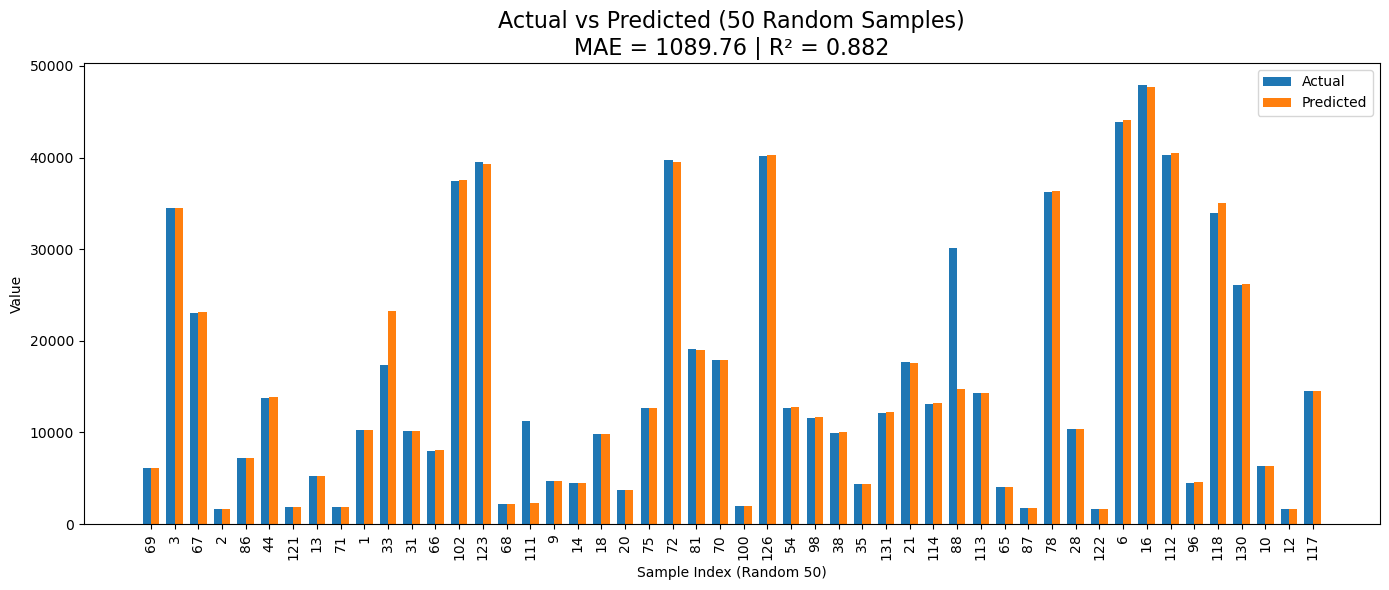

In [316]:
indices = np.random.choice(len(y_test), size= 50, replace= False)

y_sample = df['Real'].loc[indices]
pred_sample = df['Predictions'].loc[indices]

x = np.arange(len(indices))
width = 0.35  

plt.figure(figsize=(14, 6))

plt.bar(x - width / 2, y_sample, width, label="Actual")
plt.bar(x + width / 2, pred_sample, width, label="Predicted")

plt.xlabel("Sample Index (Random 50)")
plt.ylabel("Value")
plt.title(f"Actual vs Predicted (50 Random Samples)\nMAE = {mae:.2f} | R² = {r_squared:.3f}", fontsize=16)
plt.xticks(x, indices, rotation=90)  # show original indices
plt.legend()
plt.tight_layout()
plt.show()